In [12]:
import pandas as pd

In [13]:
# Read the August 2012 power data from the data folder
df = pd.read_csv("../data/2012-12-power-survey-london.csv")
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-12-01 00:00:00,49.712,4.840,27.291,73.613,305.244000,114.796,32.145,80.644,8.107,...,96,125,87,86,706,38,4410,1011.474999,0.229359,0.320658
1,2012-12-01 00:30:00,42.270,3.919,24.144,61.243,334.766999,102.585,31.681,69.007,6.793,...,96,125,87,87,706,38,4412,1040.591999,0.235855,0.455222
2,2012-12-01 01:00:00,34.621,3.012,21.683,55.938,310.025999,88.111,33.461,61.230,6.579,...,96,125,87,87,706,38,4412,947.573999,0.214772,0.429284
3,2012-12-01 01:30:00,28.279,2.805,18.645,51.647,277.087000,81.909,29.419,54.084,5.164,...,96,125,87,87,706,38,4412,839.808000,0.190346,0.391568
4,2012-12-01 02:00:00,30.286,2.240,16.981,45.070,255.998000,77.893,23.578,49.348,4.676,...,96,125,87,87,706,38,4412,764.308001,0.173234,0.354118


In [14]:
from datetime import datetime
# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"

# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

In [15]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
0,2012-12-01 00:00:00,49.712,4.840,27.291,73.613,305.244000,114.796,32.145,80.644,8.107,...,87,86,706,38,4410,1011.474999,0.229359,0.320658,1,0:00
1,2012-12-01 00:30:00,42.270,3.919,24.144,61.243,334.766999,102.585,31.681,69.007,6.793,...,87,87,706,38,4412,1040.591999,0.235855,0.455222,1,0:30
2,2012-12-01 01:00:00,34.621,3.012,21.683,55.938,310.025999,88.111,33.461,61.230,6.579,...,87,87,706,38,4412,947.573999,0.214772,0.429284,1,1:00
3,2012-12-01 01:30:00,28.279,2.805,18.645,51.647,277.087000,81.909,29.419,54.084,5.164,...,87,87,706,38,4412,839.808000,0.190346,0.391568,1,1:30
4,2012-12-01 02:00:00,30.286,2.240,16.981,45.070,255.998000,77.893,23.578,49.348,4.676,...,87,87,706,38,4412,764.308001,0.173234,0.354118,1,2:00


In [16]:
# Create a plotting function to plot the energy consumption associated with a dataframe.

import matplotlib.pyplot as plt
%matplotlib inline 

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

In [17]:
# Create a dataframe representing energy consumption for February 11th 2012, the day
# of the England vs. Italy game.

df_England_NewZealand_12_01 = df.loc[df['day']==1]
df_England_NewZealand_12_01 = df_England_NewZealand_12_01.set_index(df_England_NewZealand_12_01["tstamp"])
df_England_NewZealand_12_01.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-12-01 00:00:00,49.712,4.840,27.291,73.613,305.244000,114.796,32.145,80.644,8.107,...,87,86,706,38,4410,1011.474999,0.229359,0.320658,1,0:00
0:30,2012-12-01 00:30:00,42.270,3.919,24.144,61.243,334.766999,102.585,31.681,69.007,6.793,...,87,87,706,38,4412,1040.591999,0.235855,0.455222,1,0:30
1:00,2012-12-01 01:00:00,34.621,3.012,21.683,55.938,310.025999,88.111,33.461,61.230,6.579,...,87,87,706,38,4412,947.573999,0.214772,0.429284,1,1:00
1:30,2012-12-01 01:30:00,28.279,2.805,18.645,51.647,277.087000,81.909,29.419,54.084,5.164,...,87,87,706,38,4412,839.808000,0.190346,0.391568,1,1:30
2:00,2012-12-01 02:00:00,30.286,2.240,16.981,45.070,255.998000,77.893,23.578,49.348,4.676,...,87,87,706,38,4412,764.308001,0.173234,0.354118,1,2:00


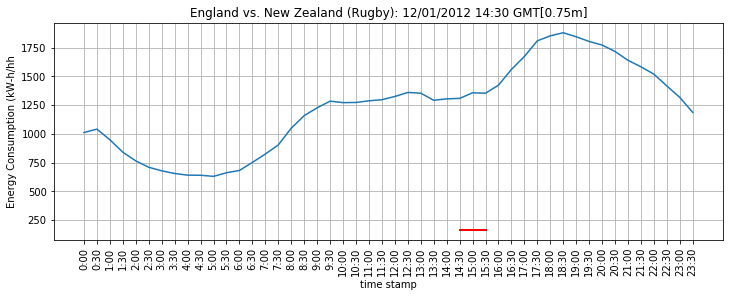

In [18]:
# Enter details for the England vs. France game, which took place on day 11
# between 15:00 and 17:00 (approx).

dfevent = df_England_NewZealand_12_01
title   = "England vs. New Zealand (Rugby): 12/01/2012 14:30 GMT [0.75m]"
tsb     = '14:30'
tse     = '15:30'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [19]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_England_NewZealand_12_01["A_sigma"] + df_England_NewZealand_12_01["B_sigma"] + df_England_NewZealand_12_01["C_sigma"]
Acorn2  = df_England_NewZealand_12_01["D_sigma"] + df_England_NewZealand_12_01["E_sigma"]
Acorn3  = df_England_NewZealand_12_01["F_sigma"] + df_England_NewZealand_12_01["G_sigma"] + df_England_NewZealand_12_01["H_sigma"] \
                                           + df_England_NewZealand_12_01["I_sigma"] + df_England_NewZealand_12_01["J_sigma"]
Acorn4  = df_England_NewZealand_12_01["K_sigma"] + df_England_NewZealand_12_01["L_sigma"] + df_England_NewZealand_12_01["M_sigma"] \
                                           + df_England_NewZealand_12_01["N_sigma"]
Acorn5  = df_England_NewZealand_12_01["O_sigma"] + df_England_NewZealand_12_01["P_sigma"] + df_England_NewZealand_12_01["Q_sigma"]

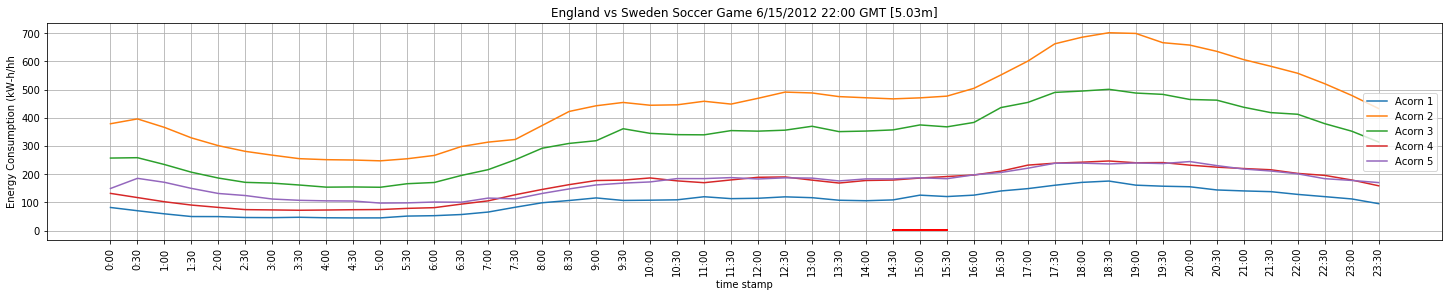

In [21]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. New Zealand (Rugby): 12/01/2012 14:30 GMT [0.75m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '15:30'], [0.5, 0.5], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [22]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

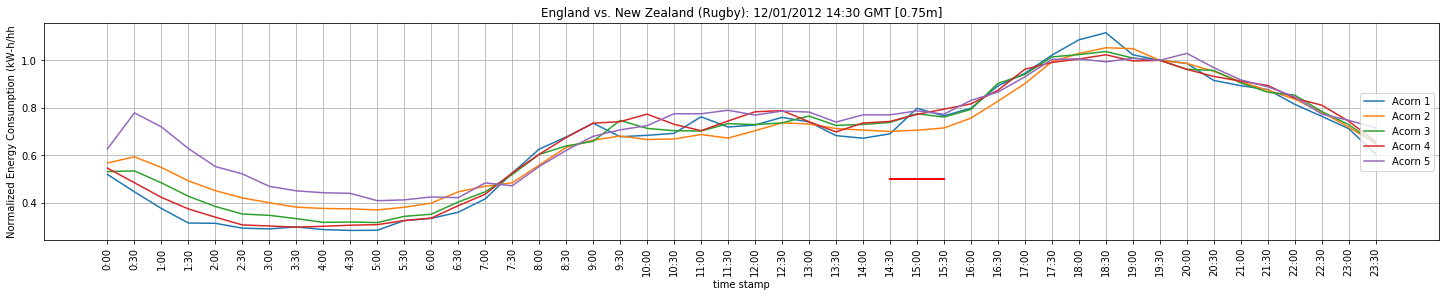

In [23]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(25,4))
hnd1, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_NewZealand_12_01["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. New Zealand (Rugby): 12/01/2012 14:30 GMT [0.75m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '15:30'], [0.5, 0.5], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()